# Valencia data by districts to begin a business


July 20, 2021 \
By Luis Enrique Palma \
https://www.linkedin.com/in/luisenriquepalma

## 1. Introducctory Section

En este laboratorio usted aprenderá detalladamente a realizar llamadas a la API de FourSquare con distintos propositos. Aprenderá a construir una URL para enviar peticiones a la API para buscar lugares específicos, explorar un sitio en particular, un usuario de FourSquare o alguna referencia geografica, además, podrá obtener los lugares de modam alrededor de alguna locación. También aprederá a usar la librería de visualización Folium para ver los resultados.
Valencia is the third largest city in Spain, it is the capital of the province of Valencia which is located in the Valencian Community, this report will show relevant demographic data, analysis of interest and an ideal tool that will serve as support for those interested in starting a business in the city.

Valencia is located in the east of Spain, facing the Mediterranean Sea, it is crossed by the Turia river, the greatest contribution to its economy is by tourism and services, on a smaller scale there are industrial, construction and agriculture. Valencia capital is made up of 19 districts, which will be presented in this report according to the average characteristics of its habitants to have an adequate idea of what type of business will be more worth starting in each of the districts. 

In [1]:
import numpy as np # librería para manejar datos vectorizados

import pandas as pd # librería para análisis de datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # librería para manejar archivos JSON 

!conda install -c conda-forge geopy --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud

import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas

# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare
import folium # librería para graficar mapas 

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
!pip install geopandas
!pip install geopy
!pip install geocoder
!pip install folium

In [3]:
import requests
import json 
import geocoder
from geopandas.tools import geocode

In [4]:
DF = pd.read_csv('DistValencia.csv', header=0)
DF.tail() # Data taken from https://www.valencia.es/es/cas/estadistica/mapa-barrios 

,District
14,Rascanya
15,Benicalap
16,Pobles del Nord
17,Pobles de l’Oest
18,Pobles del Sud


In [5]:
districts=DF['District']
districts=districts+', Valencia, Spain'

In [6]:
districts

0         Ciutat Vella, Valencia, Spain
1           l’Eixample, Valencia, Spain
2            Extramurs, Valencia, Spain
3             Campanar, Valencia, Spain
4            la Saïdia, Valencia, Spain
5      el Pla del Real, Valencia, Spain
6          l’Olivereta, Valencia, Spain
7              Patraix, Valencia, Spain
8                Jesús, Valencia, Spain
9      Quatre Carreres, Valencia, Spain
10    Poblats Marítims, Valencia, Spain
11      Camins al Grau, Valencia, Spain
12             Algirós, Valencia, Spain
13          Benimaclet, Valencia, Spain
14            Rascanya, Valencia, Spain
15           Benicalap, Valencia, Spain
16     Pobles del Nord, Valencia, Spain
17    Pobles de l’Oest, Valencia, Spain
18      Pobles del Sud, Valencia, Spain
Name: District, dtype: object

In [7]:
LLn=[]
for i in districts:
    lat_long_many=geocoder.osm(i)
    LLn.append(lat_long_many.osm)

In [8]:
LLn[0]

{'x': -0.3756332165335792,
 'y': 39.47465245,
 'addr:city': 'València',
 'addr:state': 'Comunitat Valenciana',
 'addr:country': 'España'}

In [9]:
LLn[0]['y']

39.47465245

In [10]:
# definir las columnas del datagrama
column_names = ['Latitude', 'Longitude'] 

# inicializar el dataframe
distr = pd.DataFrame(columns=column_names)

distr

,Latitude,Longitude


In [11]:
column_names = ['Latitude', 'Longitude'] 

# inicializar el dataframe
distr = pd.DataFrame(columns=column_names)

for i in LLn:
    
    distr_lat = i['y']
    distr_lon = i['x']
    
    distr = distr.append({'Latitude': distr_lat,
                          'Longitude': distr_lon}, ignore_index=True)
    
distr

,Latitude,Longitude
0,39.474652,-0.375633
1,39.463692,-0.369000
2,39.467878,-0.384593
3,39.485391,-0.408333
4,39.484274,-0.374029
5,39.474644,-0.360021
6,39.469459,-0.404499
7,39.457634,-0.401630
8,39.449989,-0.388681
9,39.444516,-0.360099


In [12]:
DF['Latitude']=distr['Latitude']

In [13]:
DF['Longitude']=distr['Longitude']

In [14]:
DF.tail()

,District,Latitude,Longitude
14,Rascanya,39.495598,-0.368790
15,Benicalap,39.494270,-0.391193
16,Pobles del Nord,39.557672,-0.299720
17,Pobles de l’Oest,39.499929,-0.420658
18,Pobles del Sud,39.368715,-0.324864


In [15]:
#El promedio de las coordenadas de Latitud y Longitud para poder centrar correctamente en el mapa
avg_Latitude=sum(DF['Latitude'])/len(DF['Latitude'])
print('Average Latitude is :', avg_Latitude)

avg_Longitude=sum(DF['Longitude'])/len(DF['Longitude'])
print('Average Longitude is: ', avg_Longitude)

Average Latitude is : 39.47197410263158
Average Longitude is:  -0.3689520785909335


In [16]:
# crear un mapa de Toronto utilizando los valores de latitud y longitud promedios
map_valencia = folium.Map(location=[avg_Latitude, avg_Longitude], zoom_start=11)

# añadir marcadores al mapa
for lat, lng, District, in zip(DF['Latitude'], DF['Longitude'], DF['District']):
    label = '{}'.format(District)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_valencia)  
    
map_valencia

## 2. Metodology Section

The methodology is divided into two stages, the first consists of collecting relevant and current quantitative information with which to achieve greater precision in the estimates suggested or made with the help of the results. The second stage consists of data processing with the use of MS Excel, MS Word and Python with its different libraries to achieve the results.


### 2.1. Firts Stage: Data Minning 
Demographic and descriptive information was collected of the year 2020 of the inhabitants of Valencia by their districts through the official page of the Valencia City Council, Gross average income of 2019, from the official page of the Institute of Statistics of Spain, coordinates of their districts in Google Maps, information of current most popular businesses on Foursquare and other qualitative information on Wikipedia (not being scientific).
The Data Frame (DF) was built in MS Excel from the tables collected in the sources mentioned in the previous paragraph and the following table resulted:


In [17]:
df_val=pd.read_csv('data_val.csv')
df_val.head()

,District,Area (he),Pop/km2,Population,Men population,Women population,Age 0-19,Age 20-39,Age 40-59,Age 60 greater,Foreigns,Foreigns EU,Foreigns Rest Europe,Foreigns Africa,Foreigns North Central America,Foreign South America,Foreign Asia,Foreign Other,Unemployed,Tourism,Bus,Truck,Tractor,Trailer,Motorcycle,Moped,Average Gross income 2018
0,Ciutat Vella,169.0,16225.0,27418.0,13034.0,14384.0,4362.0,7116.0,8582.0,7358.0,4784.0,2316.0,292.0,452.0,518.0,771.0,427.0,8.0,1640.0,14073.0,526.0,1883.0,484.0,274.0,3504.0,745.0,25064.0
1,l'Eixample,173.3,24709.0,42826.0,19769.0,23057.0,7822.0,9379.0,13135.0,12490.0,4675.0,2178.0,244.0,303.0,589.0,926.0,422.0,13.0,2333.0,19745.0,2.0,1171.0,447.0,387.0,4375.0,1011.0,26142.0
2,Extramurs,197.2,24789.0,48877.0,22440.0,26437.0,8380.0,11258.0,14659.0,14580.0,5705.0,2018.0,274.0,341.0,654.0,1557.0,853.0,8.0,3140.0,21073.0,73.0,1124.0,311.0,305.0,4191.0,970.0,20247.0
3,Campanar,523.8,7395.0,38736.0,18370.0,20366.0,7868.0,8620.0,11775.0,10473.0,5178.0,1666.0,523.0,507.0,430.0,1309.0,740.0,3.0,2485.0,17422.0,90.0,725.0,213.0,158.0,2866.0,716.0,17988.0
4,la Saïdia,194.4,24431.0,47491.0,21996.0,25495.0,7815.0,11570.0,14131.0,13975.0,7222.0,2027.0,689.0,760.0,631.0,2216.0,894.0,5.0,3793.0,19351.0,5.0,1207.0,223.0,271.0,3190.0,1177.0,14429.0


## 2.2. Second Stage: Data Processing
To process the data, the previous DF will be imported in Jupyter labs and with the use of Python language and its libraries such as pandas for Data frame manipulation ; the folium library for the creation of interactive, informative and choropletic maps; the json library for the extraction of coordinates through the Beautifulsoup library, geocoder, geopy and geopandas; the seaborn and matplotlib libraries for creating frequency and other statistical data graphs; the sklearn library for the K Nearest Neighbors implementation of the most popular sites in their districts collected by Foursquare developer account and other libraries will be included to process or complement the information.


### 2.2.1 Analyzing the data
First of all, the data was cleaned and the elements of number columns that was in string type were converted to float type, then the data was analyzed with info and describe methods to see a type and statistic summary respectively. See figure (1) and (2):


In [18]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   District                        19 non-null     object 
 1   Area (he)                       19 non-null     float64
 2   Pop/km2                         19 non-null     float64
 3   Population                      19 non-null     float64
 4   Men population                  19 non-null     float64
 5   Women population                19 non-null     float64
 6   Age 0-19                        19 non-null     float64
 7   Age 20-39                       19 non-null     float64
 8   Age 40-59                       19 non-null     float64
 9   Age 60 greater                  19 non-null     float64
 10  Foreigns                        19 non-null     float64
 11  Foreigns EU                     19 non-null     float64
 12  Foreigns Rest Europe            19 non

In [19]:
df_val.describe()

,Area (he),Pop/km2,Population,Men population,Women population,Age 0-19,Age 20-39,Age 40-59,Age 60 greater,Foreigns,Foreigns EU,Foreigns Rest Europe,Foreigns Africa,Foreigns North Central America,Foreign South America,Foreign Asia,Foreign Other,Unemployed,Tourism,Bus,Truck,Tractor,Trailer,Motorcycle,Moped,Average Gross income 2018
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,519.910526,16201.894737,42186.578947,20058.789474,22127.789474,7646.105263,9990.105263,13042.947368,11507.421053,5824.842105,1704.315789,404.315789,634.157895,506.736842,1602.684211,966.842105,5.789474,3345.000000,18474.578947,47.157895,1134.000000,363.315789,356.105263,3184.157895,1103.684211,16678.894737
std,749.226919,8351.209160,17489.813109,8399.449179,9108.808488,3348.386260,4037.707998,5743.886368,4599.216555,2925.109158,786.472579,237.082980,449.001641,250.194778,906.544419,664.067957,5.191649,1772.800923,7046.036256,118.574526,481.763081,245.296658,322.135047,1233.011997,514.093599,4774.948166
min,157.000000,433.000000,6582.000000,3179.000000,3403.000000,1333.000000,1334.000000,2102.000000,1813.000000,472.000000,185.000000,44.000000,79.000000,56.000000,94.000000,11.000000,1.000000,396.000000,3452.000000,0.000000,315.000000,94.000000,70.000000,668.000000,301.000000,11576.000000
25%,195.800000,9891.500000,29665.000000,13739.500000,15925.500000,4982.500000,7522.500000,8395.000000,8796.500000,3830.000000,1197.000000,215.000000,303.000000,332.000000,810.500000,438.000000,3.000000,1851.000000,14620.000000,3.500000,720.500000,201.000000,172.500000,2792.500000,734.000000,13064.500000
50%,236.700000,18101.000000,47421.000000,21996.000000,24474.000000,7868.000000,11258.000000,14131.000000,12490.000000,5705.000000,1666.000000,423.000000,507.000000,534.000000,1557.000000,894.000000,4.000000,3140.000000,19719.000000,9.000000,1171.000000,249.000000,243.000000,3282.000000,1011.000000,14907.000000
75%,347.600000,22916.000000,53575.000000,26045.500000,27529.500000,9794.000000,12858.000000,17035.500000,14584.000000,7953.500000,2102.500000,616.000000,916.000000,642.500000,2375.000000,1363.500000,8.000000,4500.500000,22028.500000,32.500000,1485.500000,511.500000,360.500000,4091.000000,1371.500000,17880.500000
max,3242.600000,27834.000000,74518.000000,35749.000000,38769.000000,13683.000000,17255.000000,23742.000000,19838.000000,10707.000000,3105.000000,766.000000,1889.000000,1043.000000,3143.000000,2351.000000,22.000000,6741.000000,32231.000000,526.000000,2036.000000,985.000000,1291.000000,5317.000000,2286.000000,26930.000000


These three last tables are all the same, this is very important to have an idea of the behavior of the data recollected and how it describes the generality of the habitants of Valencia.

### 2.2.2 Data visualization
As we know the table data can be hard to understand, in this unit some plots will be shown to have a better familiarity of the data resulted from the Valencian Districts. 
The first plot is the population, there are to plots to know which district have more density and Population per area.


In [20]:
from numpy import median
import seaborn as sns



Text(0.5, 1.0, 'Population in Valencian Districs 2020')

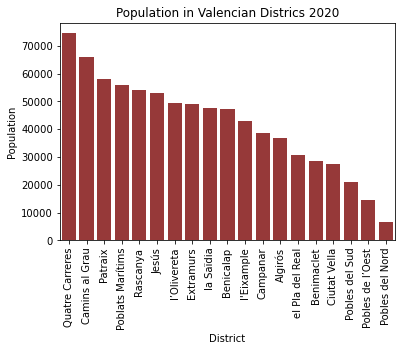

In [21]:
by_population=df_val.sort_values('Population', ascending=False)

g = sns.barplot(x='District', y='Population', data=by_population, color='brown')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.set(rc = {'figure.figsize':(10,6)})
g.set_title('Population in Valencian Districs 2020')


In [22]:
#Mapa Coropletico

In [23]:
#Importar librerías
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [24]:
#Importante convertir los distritos a mayuscula, asi estan en el archivo Json.
df_val['DISTRICT']=df_val['District'].apply(lambda x: x.upper())

In [25]:
df_val.head()

,District,Area (he),Pop/km2,Population,Men population,Women population,Age 0-19,Age 20-39,Age 40-59,Age 60 greater,Foreigns,Foreigns EU,Foreigns Rest Europe,Foreigns Africa,Foreigns North Central America,Foreign South America,Foreign Asia,Foreign Other,Unemployed,Tourism,Bus,Truck,Tractor,Trailer,Motorcycle,Moped,Average Gross income 2018,DISTRICT
0,Ciutat Vella,169.0,16225.0,27418.0,13034.0,14384.0,4362.0,7116.0,8582.0,7358.0,4784.0,2316.0,292.0,452.0,518.0,771.0,427.0,8.0,1640.0,14073.0,526.0,1883.0,484.0,274.0,3504.0,745.0,25064.0,CIUTAT VELLA
1,l'Eixample,173.3,24709.0,42826.0,19769.0,23057.0,7822.0,9379.0,13135.0,12490.0,4675.0,2178.0,244.0,303.0,589.0,926.0,422.0,13.0,2333.0,19745.0,2.0,1171.0,447.0,387.0,4375.0,1011.0,26142.0,L'EIXAMPLE
2,Extramurs,197.2,24789.0,48877.0,22440.0,26437.0,8380.0,11258.0,14659.0,14580.0,5705.0,2018.0,274.0,341.0,654.0,1557.0,853.0,8.0,3140.0,21073.0,73.0,1124.0,311.0,305.0,4191.0,970.0,20247.0,EXTRAMURS
3,Campanar,523.8,7395.0,38736.0,18370.0,20366.0,7868.0,8620.0,11775.0,10473.0,5178.0,1666.0,523.0,507.0,430.0,1309.0,740.0,3.0,2485.0,17422.0,90.0,725.0,213.0,158.0,2866.0,716.0,17988.0,CAMPANAR
4,la Saïdia,194.4,24431.0,47491.0,21996.0,25495.0,7815.0,11570.0,14131.0,13975.0,7222.0,2027.0,689.0,760.0,631.0,2216.0,894.0,5.0,3793.0,19351.0,5.0,1207.0,223.0,271.0,3190.0,1177.0,14429.0,LA SAÏDIA


In [26]:
!wget --quiet http://mapas.valencia.es/lanzadera/opendata/Distritos/JSON?srsName=EPSG%3A4326 -O valencia_geo.json
    
#http://mapas.valencia.es/lanzadera/opendata/Distritos/JSON?srsName=EPSG%3A4326    
print('GeoJSON file downloaded!')

valencia_geo = r'valencia_geo.json'

#Valencia La, Lo
latitude = avg_Latitude
longitude = avg_Longitude


GeoJSON file downloaded!


In [27]:

# display Valencia
valencia_map = folium.Map(location=[latitude, longitude], zoom_start=11)
valencia_map.choropleth(
    geo_data=valencia_geo,
    data=df_val,
    columns=['DISTRICT','Population'],
    key_on='feature.properties.nombre', #Asi esta en json
    fill_color='OrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population of Valencian Districts',
    highlight=True
)
for lat, lng, District, in zip(DF['Latitude'], DF['Longitude'], DF['District']):
    label = '{}'.format(District)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3.5,
        popup=label,
        color='black',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(valencia_map)  
    



#display map
valencia_map

Now we know that Districts named: Quatre Carreres, Camins al Grau, Patraix, Poblats Maritims and Rascanya are the most populated, there are some businesses that need lots of people like supermarkets, fast food restaurants, schools and other. Let’s look what districts have the most and less gross income. 

Text(0.5, 1.0, 'Average Gross Income (€) of habitants in Valencia by Districs 2018')

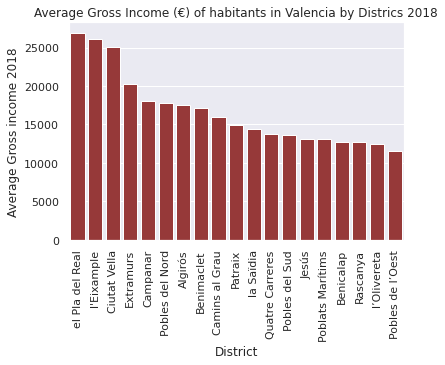

In [28]:
by_income=df_val.sort_values('Average Gross income 2018', ascending=False)

g = sns.barplot(x='District', y='Average Gross income 2018', data=by_income, color='brown')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.set(rc = {'figure.figsize':(10,6)})
g.set_title('Average Gross Income (€) of habitants in Valencia by Districs 2018')

In [29]:

# display Valencia
valencia_map_income = folium.Map(location=[latitude-0.02, longitude+0.1], zoom_start=11)
valencia_map_income.choropleth(
    geo_data=valencia_geo,
    data=df_val,
    columns=['DISTRICT','Average Gross income 2018'],
    key_on='feature.properties.nombre',
    fill_color='OrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Gross Income of habitants of Valencian by Districts',
    highlight=True
)
for lat, lng, District, in zip(DF['Latitude'], DF['Longitude'], DF['District']):
    label = '{}'.format(District)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3.5,
        popup=label,
        color='black',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(valencia_map_income)  
    



#display map
valencia_map_income

In [30]:

# display Valencia
valencia_map_foreign = folium.Map(location=[latitude-0.02, longitude+0.1], zoom_start=11)
valencia_map_foreign.choropleth(
    geo_data=valencia_geo,
    data=df_val,
    columns=['DISTRICT','Foreigns'],
    key_on='feature.properties.nombre',
    fill_color='OrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Foreigns in Valencian Districts',
    highlight=True
)
for lat, lng, District, in zip(DF['Latitude'], DF['Longitude'], DF['District']):
    label = '{}'.format(District)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3.5,
        popup=label,
        color='black',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(valencia_map_foreign)  
    



#display map
valencia_map_foreign

Now we know that Districts named: el Pla del Real, l’Eixample and Ciutat Vella are the district which habitants have the greatest economic power in Valencia, as we can see they tend to be at the center of city. This can be relevant to begin deluxe business like gourmet restaurants, spa (it could be better near the beach), wine store and other. There could be some business related to vehicles, in the next plots, we can see the districts with the most vehicle fleet. It’s divided in vehicle and heavy vehicle fleet.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


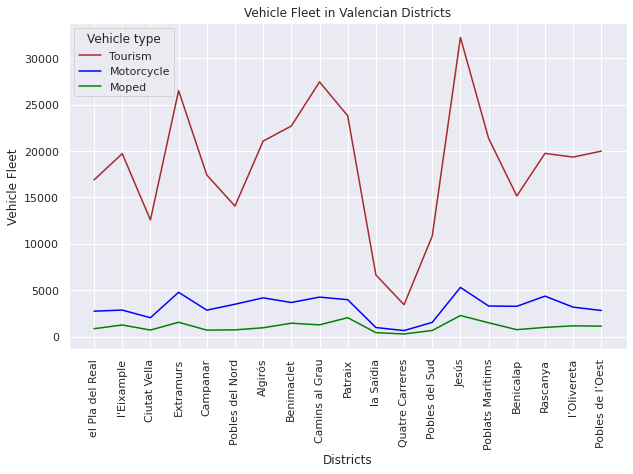

In [31]:
g3 = sns.lineplot(x='District', y='Tourism ', data=df_val, color='brown')
g3 = sns.lineplot(x='District', y='Motorcycle', data=df_val, color='blue')
g3 = sns.lineplot(x='District', y='Moped', data=df_val, color='green')

g3.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.set(rc = {'figure.figsize':(10,6)})
g3.set_title('Vehicle Fleet in Valencian Districts')
g3.set(xlabel='Districts', ylabel='Vehicle Fleet')
g3.legend(title='Vehicle type', loc='upper left', labels=['Tourism ', 'Motorcycle', 'Moped'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


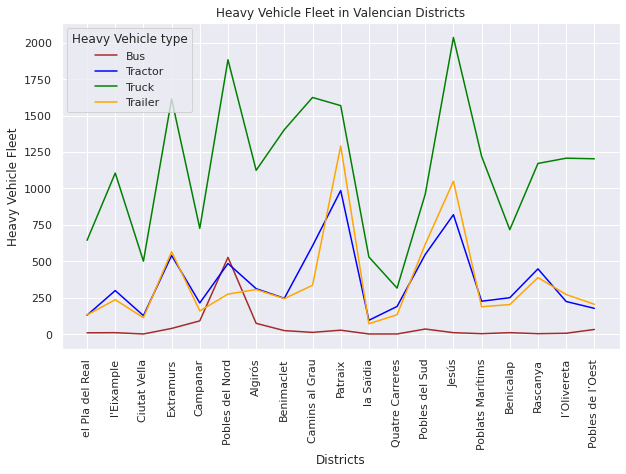

In [32]:
g2 = sns.lineplot(x='District', y='Bus', data=df_val, color='brown')
g2 = sns.lineplot(x='District', y='Tractor', data=df_val, color='blue')
g2 = sns.lineplot(x='District', y='Truck', data=df_val, color='green')
g2 = sns.lineplot(x='District', y='Trailer', data=df_val, color='orange')



g2.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.set(rc = {'figure.figsize':(10,6)})
g2.set_title('Heavy Vehicle Fleet in Valencian Districts')
g2.set(xlabel='Districts', ylabel='Heavy Vehicle Fleet')
g2.legend(title='Heavy Vehicle type', loc='upper left', labels=['Bus', 'Tractor', 'Truck', 'Trailer'])


There are a lot of plots that could be shown, but I think there are the most relevant to see, to know some of Valencian districts inhabitants. 

### 2.2.3 Clustering the venues
Foursquare have a venue database, which helps to find the most popular venues in a city, using the Foursquare API, I set a Radius of 750, and limit to 100 venues. We obtain a table with 597 rows like we see in Table 4


In [33]:
address = 'Valencia, Spain'

geolocator = Nominatim(user_agent="val_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 39.4697065, -0.3763353.


In [34]:
CLIENT_ID = 'N5WAI035VYJB4GO0WNCF2M2NUJX5TVOJMSV4UIFWP3DQB3IH' # su ID de Foursquare
CLIENT_SECRET = 'JBTDUFWQ1J0P1WAK2KPUOQKB3HU1ESYMZEGRAIECZHJOKE0M' # Secreto de Foursquare
VERSION = '20180605' # versión de la API de Foursquare
LIMIT = 100 # Un valor límite para la API de Foursquare

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N5WAI035VYJB4GO0WNCF2M2NUJX5TVOJMSV4UIFWP3DQB3IH
CLIENT_SECRET:JBTDUFWQ1J0P1WAK2KPUOQKB3HU1ESYMZEGRAIECZHJOKE0M


In [35]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 750 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    avg_Latitude, 
    avg_Longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=N5WAI035VYJB4GO0WNCF2M2NUJX5TVOJMSV4UIFWP3DQB3IH&client_secret=JBTDUFWQ1J0P1WAK2KPUOQKB3HU1ESYMZEGRAIECZHJOKE0M&v=20180605&ll=39.47197410263158,-0.3689520785909335&radius=750&limit=100'

In [36]:
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '60f7b720d490824a4c95dd54'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ciutat Vella',
  'headerFullLocation': 'Ciutat Vella, Valencia',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 162,
  'suggestedBounds': {'ne': {'lat': 39.47872410938158,
    'lng': -0.3602241439075392},
   'sw': {'lat': 39.465224095881574, 'lng': -0.37768001327432776}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d64a71b4fa4cbff4c55d0d9',
       'name': 'Porta de la Mar',
       'location': {'address': 'Plaza Porta de la Mar',
        'lat': 39.47174841283096,
        'lng': -0.3685569763183594,
        'labeledLatLngs': [{'label': 'display',
   

In [37]:
# función para extraer la categoria del sitio
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # objeto JSON

# filtrar columnas
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filtrar la categoría para cada fila
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# limpiar columnas
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Porta de la Mar,Plaza,39.471748,-0.368557
1,La Petite Brioche Bakery,Café,39.470264,-0.367109
2,Restaurante Almunia,Moroccan Restaurant,39.472355,-0.371554
3,Ostras Pedrín,Gastropub,39.471783,-0.371708
4,Fundación Bancaja,Art Gallery,39.473629,-0.370051


In [39]:
nearby_venues.head(15)


,name,categories,lat,lng
0,Porta de la Mar,Plaza,39.471748,-0.368557
1,La Petite Brioche Bakery,Café,39.470264,-0.367109
2,Restaurante Almunia,Moroccan Restaurant,39.472355,-0.371554
3,Ostras Pedrín,Gastropub,39.471783,-0.371708
4,Fundación Bancaja,Art Gallery,39.473629,-0.370051
5,7 Moons,Bed & Breakfast,39.471319,-0.366507
6,Massimo Dutti,Clothing Store,39.470115,-0.370082
7,El Parterre,Park,39.472549,-0.370421
8,Mercado Colón,Market,39.468955,-0.368303
9,Hotel Hospes Palau de la Mar*****,Hotel,39.470853,-0.366686


In [40]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [41]:
"""
Hasta aqui se toma en cuenta el Centro promedio de la ciudad de Valencia
"""


'\nHasta aqui se toma en cuenta el Centro promedio de la ciudad de Valencia\n'

In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # crear la URL de solicitud de API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # solicitud GET
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # regresa solo información relevante de cada sitio cercano
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
# 
valencia_venues = getNearbyVenues(names=DF['District'],
                                   latitudes=DF['Latitude'],
                                   longitudes=DF['Longitude']
                                  )

Ciutat Vella
l’Eixample
Extramurs
Campanar
la Saïdia
el Pla del Real
l’Olivereta
Patraix
Jesús
Quatre Carreres
Poblats Marítims
Camins al Grau
Algirós
Benimaclet
Rascanya
Benicalap
Pobles del Nord
Pobles de l’Oest
Pobles del Sud


In [44]:
print(valencia_venues.shape)
valencia_venues.head(10)

(593, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ciutat Vella,39.474652,-0.375633,Colmado Lalola,39.475241,-0.375624,Tapas Restaurant
1,Ciutat Vella,39.474652,-0.375633,San Tommaso,39.475282,-0.377144,Italian Restaurant
2,Ciutat Vella,39.474652,-0.375633,Catedral de Valencia,39.475724,-0.375005,Church
3,Ciutat Vella,39.474652,-0.375633,Plaça de la Reina,39.474792,-0.375501,Plaza
4,Ciutat Vella,39.474652,-0.375633,Véneta Food & Gelato Italiano,39.475332,-0.375657,Ice Cream Shop
5,Ciutat Vella,39.474652,-0.375633,Gelateria La Romana,39.473107,-0.376200,Ice Cream Shop
6,Ciutat Vella,39.474652,-0.375633,La Nocciola Toscana,39.474042,-0.374516,Ice Cream Shop
7,Ciutat Vella,39.474652,-0.375633,Oslo - The Vegetarian,39.475949,-0.377397,Vegetarian / Vegan Restaurant
8,Ciutat Vella,39.474652,-0.375633,Creperie Bretonne,39.475236,-0.375981,French Restaurant
9,Ciutat Vella,39.474652,-0.375633,La Pappardella,39.475327,-0.376086,Italian Restaurant


To cluster the common venues, I will use K-mean, an unsupervised learning algorithm, starting with 2 k-clusters and using the elbow method to kind the optimal k-cluster, we’ll have the graphic in figure 8. It helps us to corroborate the correct assumed k-cluster.m

In [45]:
valencia_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Algirós,60,60,60,60,60,60
Benicalap,8,8,8,8,8,8
Benimaclet,46,46,46,46,46,46
Camins al Grau,51,51,51,51,51,51
Campanar,4,4,4,4,4,4
Ciutat Vella,100,100,100,100,100,100
Extramurs,78,78,78,78,78,78
Jesús,15,15,15,15,15,15
Patraix,9,9,9,9,9,9


In [46]:
print('There are {} uniques categories.'.format(len(valencia_venues['Venue Category'].unique())))

There are 141 uniques categories.


In [47]:
# codificación para analizar cada Distrito
valencia_onehot = pd.get_dummies(valencia_venues[['Venue Category']], prefix="", prefix_sep="")

# añadir la columna de District de regreso al dataframe
valencia_onehot['District'] = valencia_venues['District'] 

# mover la columna de barrio a la primer columna
fixed_columns = [valencia_onehot.columns[-1]] + list(valencia_onehot.columns[:-1])
valencia_onehot = valencia_onehot[fixed_columns]

valencia_onehot.head()

,District,American Restaurant,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Burger Joint,Cafeteria,Café,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Creperie,Cruise Ship,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Neighborhood,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Outdoors & Recreation,Paella Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pub,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Theater,Theme Restaurant,Tourist Information Center,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar
0,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
valencia_onehot.shape

(593, 142)

In [49]:
valencia_grouped = valencia_onehot.groupby('District').mean().reset_index()
valencia_grouped

,District,American Restaurant,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Burger Joint,Cafeteria,Café,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Creperie,Cruise Ship,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Neighborhood,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Outdoors & Recreation,Paella Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pub,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Theater,Theme Restaurant,Tourist Information Center,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar
0,Algirós,0.000000,0.000000,0.000000,0.016667,0.016667,0.000000,0.0,0.000000,0.016667,0.050000,0.000000,0.016667,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.033333,0.000000,0.033333,0.016667,0.00,0.000000,0.000000,0.016667,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.0,0.000000,0.00,0.016667,0.000000,0.033333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.016667,0.000000,0.000000,0.016667,0.016667,0.000000,0.016667,0.033333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.016667,0.050000,0.000000,0.000000,0.000000,0.016667,0.0,0.000000,0.00,0.000000,0.016667,0.000000,0.016667,0.000000,0.016667,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.033333,0.016667,0.016667,0.000,0.033333,0.000000,0.016667,0.033333,0.000000,0.000000,0.000000,0.000,0.033333,0.000000,0.000000,0.000000,0.116667,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.00
1,Benicalap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0

In [50]:
valencia_grouped.shape

(19, 142)

In [51]:
num_top_venues = 5

for hood in valencia_grouped['District']:
    print("----"+hood+"----")
    temp = valencia_grouped[valencia_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Algirós----
                venue  freq
0  Spanish Restaurant  0.12
1  Italian Restaurant  0.05
2         Supermarket  0.05
3                 Bar  0.05
4    Tapas Restaurant  0.05


----Benicalap----
              venue  freq
0       Supermarket  0.12
1  Tapas Restaurant  0.12
2     Shopping Mall  0.12
3        Restaurant  0.12
4     Grocery Store  0.12


----Benimaclet----
                venue  freq
0    Tapas Restaurant  0.15
1  Spanish Restaurant  0.09
2                Café  0.09
3                 Bar  0.09
4         Pizza Place  0.07


----Camins al Grau----
                      venue  freq
0                     Hotel  0.10
1        Seafood Restaurant  0.08
2  Mediterranean Restaurant  0.06
3          Tapas Restaurant  0.06
4               Supermarket  0.06


----Campanar----
                 venue  freq
0           Restaurant  0.25
1        Grocery Store  0.25
2                 Pool  0.25
3          Gas Station  0.25
4  American Restaurant  0.00


----Ciutat Vella----
      

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# crear las columnas acorde al numero de sitios populares
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# crear un nuevo dataframe
District_venues_sorted = pd.DataFrame(columns=columns)
District_venues_sorted['District'] = valencia_grouped['District']

for ind in np.arange(valencia_grouped.shape[0]):
    District_venues_sorted.iloc[ind, 1:] = return_most_common_venues(valencia_grouped.iloc[ind, :], num_top_venues)

District_venues_sorted.head(19)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Algirós,Spanish Restaurant,Tapas Restaurant,Supermarket,Bar,Italian Restaurant,Pub,Sandwich Place,Pizza Place,Halal Restaurant,Fast Food Restaurant
1,Benicalap,Shopping Mall,Tapas Restaurant,Restaurant,Brewery,Pool,Grocery Store,Supermarket,Gym / Fitness Center,Dive Bar,Diner
2,Benimaclet,Tapas Restaurant,Spanish Restaurant,Café,Bar,Pizza Place,Cocktail Bar,Brewery,Coffee Shop,Bakery,Mediterranean Restaurant
3,Camins al Grau,Hotel,Seafood Restaurant,Mediterranean Restaurant,Pub,Tapas Restaurant,Supermarket,Restaurant,Japanese Restaurant,Bakery,Italian Restaurant
4,Campanar,Grocery Store,Pool,Gas Station,Restaurant,French Restaurant,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Wine Bar
5,Ciutat Vella,Plaza,Tapas Restaurant,Spanish Restaurant,Ice Cream Shop,Restaurant,Hotel,Italian Restaurant,Coffee Shop,Paella Restaurant,Mediterranean Restaurant
6,Extramurs,Spanish Restaurant,Bakery,Tapas Restaurant,Plaza,Grocery Store,Hotel,Coffee Shop,Mediterranean Restaurant,Breakfast Spot,Rock Club
7,Jesús,Restaurant,Grocery Store,Coffee Shop,Supermarket,Performing Arts Venue,Café,Brewery,Seafood Restaurant,Gas Station,Spanish Restaurant
8,Patraix,Mediterranean Restaurant,Grocery Store,Miscellaneous Shop,Spanish Restaurant,Fast Food Restaurant,Café,Supermarket,Department Store,Metro Station,Event Space
9,Poblats Marítims,Office,Spanish Restaurant,Cruise Ship,Tourist Information Center,Harbor / Marina,Boat or Ferry,Athletics & Sports,Supermarket,Southern / Soul Food Restaurant,French Restaurant


In [54]:
#Agrupar por distritos por agrupaciones de 2

# establecer el número de agrupaciones
kclusters = 2

valencia_grouped_clustering = valencia_grouped.drop('District', 1)

# ejecutar k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(valencia_grouped_clustering)

# revisar las etiquetas de las agrupaciones generadas para cada fila del dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

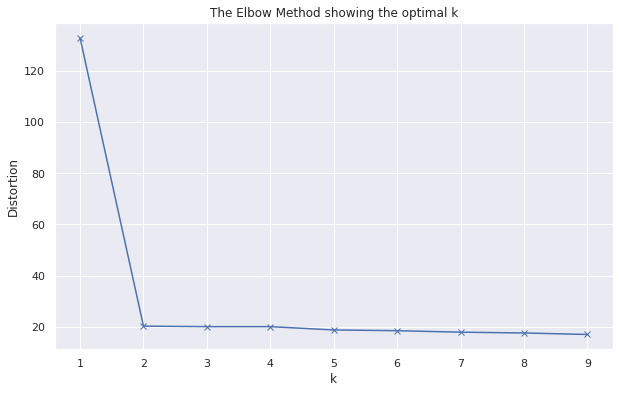

In [55]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(valencia_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(valencia_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / valencia_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
# añadir etiquetas
District_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

valencia_merged = DF

# juntar valencia_grouped con valencia_data 
valencia_merged = valencia_merged.join(District_venues_sorted.set_index('District'), on='District')

valencia_merged.head() # revisar las ultimas columnas

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,39.474652,-0.375633,1,Plaza,Tapas Restaurant,Spanish Restaurant,Ice Cream Shop,Restaurant,Hotel,Italian Restaurant,Coffee Shop,Paella Restaurant,Mediterranean Restaurant
1,l’Eixample,39.463692,-0.369000,1,Restaurant,Spanish Restaurant,Tapas Restaurant,Italian Restaurant,Mediterranean Restaurant,Café,Japanese Restaurant,Paella Restaurant,Bakery,Pizza Place
2,Extramurs,39.467878,-0.384593,1,Spanish Restaurant,Bakery,Tapas Restaurant,Plaza,Grocery Store,Hotel,Coffee Shop,Mediterranean Restaurant,Breakfast Spot,Rock Club
3,Campanar,39.485391,-0.408333,1,Grocery Store,Pool,Gas Station,Restaurant,French Restaurant,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Wine Bar
4,la Saïdia,39.484274,-0.374029,1,Grocery Store,Bridge,Tapas Restaurant,Café,Bakery,Park,Gay Bar,Boutique,Pub,Restaurant


In [57]:
count_venue = valencia_merged
count_venue = count_venue.drop(['District', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Grocery Store,History Museum,Hotel,Kids Store,Mediterranean Restaurant,Office,Playground,Plaza,Restaurant,Sandwich Place,Shopping Mall,Spanish Restaurant,Tapas Restaurant
0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,1,1,1,1,1,1,1,2,1,1,3,1


Text(0, 0.5, 'Clusters')

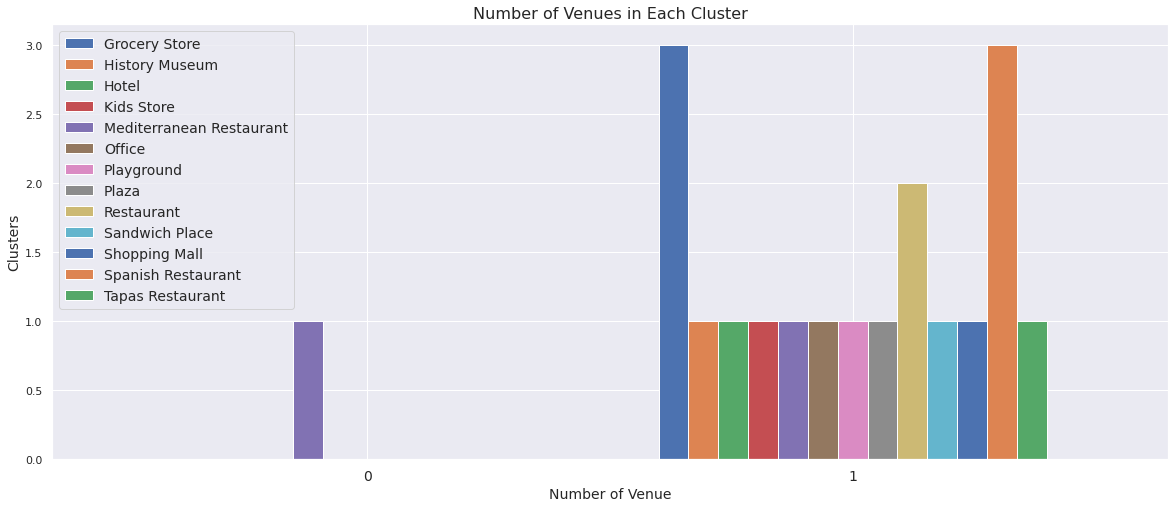

In [58]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

In [59]:
# crear mapa
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(valencia_merged['Latitude'], valencia_merged['Longitude'], valencia_merged['District'], valencia_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [60]:
#Examinar agrupaciones

In [61]:
#Agrupacion #1
valencia_merged.loc[valencia_merged['Cluster Labels'] == 0, valencia_merged.columns[[0] + list(range(5, valencia_merged.shape[1]))]]

,District,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Pobles del Sud,Nudist Beach,Wine Bar,Farmers Market,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Food & Drink Shop,Fast Food Restaurant,Falafel Restaurant


In [62]:
#Agrupacion #2
valencia_merged.loc[valencia_merged['Cluster Labels'] == 1, valencia_merged.columns[[0] + list(range(5, valencia_merged.shape[1]))]]

,District,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Tapas Restaurant,Spanish Restaurant,Ice Cream Shop,Restaurant,Hotel,Italian Restaurant,Coffee Shop,Paella Restaurant,Mediterranean Restaurant
1,l’Eixample,Spanish Restaurant,Tapas Restaurant,Italian Restaurant,Mediterranean Restaurant,Café,Japanese Restaurant,Paella Restaurant,Bakery,Pizza Place
2,Extramurs,Bakery,Tapas Restaurant,Plaza,Grocery Store,Hotel,Coffee Shop,Mediterranean Restaurant,Breakfast Spot,Rock Club
3,Campanar,Pool,Gas Station,Restaurant,French Restaurant,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Wine Bar
4,la Saïdia,Bridge,Tapas Restaurant,Café,Bakery,Park,Gay Bar,Boutique,Pub,Restaurant
5,el Pla del Real,Pub,Breakfast Spot,Café,Bakery,Tapas Restaurant,Shop & Service,Restaurant,Italian Restaurant,Hotel
6,l’Olivereta,Metro Station,Bowling Alley,Park,Gym / Fitness Center,Gym,Grocery Store,Bakery,Bar,Restaurant
7,Patraix,Grocery Store,Miscellaneous Shop,Spanish Restaurant,Fast Food Restaurant,Café,Supermarket,Department Store,Metro Station,Event Space
8,Jesús,Grocery Store,Coffee Shop,Supermarket,Performing Arts Venue,Café,Brewery,Seafood Restaurant,Gas Station,Spanish Restaurant
9,Quatre Carreres,Mediterranean Restaurant,Dive Bar,Auto Workshop,Restaurant,Farmers Market,Frozen Yogurt Shop,French Restaurant,Food & Drink Shop,Fast Food Restaurant


## 3.	Results Section
### 3.1 Foursquare to find the most popular venues in Valencian Districts
Now we can obtain Table 4, it gives an idea of what is working well per district. A particular visible characteristic is that all the districts less Pobles de l’Oest and l’Olivereta have restaurants as most popular venue in its district.  


In [63]:
District_venues_sorted.head(19)

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Algirós,Spanish Restaurant,Tapas Restaurant,Supermarket,Bar,Italian Restaurant,Pub,Sandwich Place,Pizza Place,Halal Restaurant,Fast Food Restaurant
1,1,Benicalap,Shopping Mall,Tapas Restaurant,Restaurant,Brewery,Pool,Grocery Store,Supermarket,Gym / Fitness Center,Dive Bar,Diner
2,1,Benimaclet,Tapas Restaurant,Spanish Restaurant,Café,Bar,Pizza Place,Cocktail Bar,Brewery,Coffee Shop,Bakery,Mediterranean Restaurant
3,1,Camins al Grau,Hotel,Seafood Restaurant,Mediterranean Restaurant,Pub,Tapas Restaurant,Supermarket,Restaurant,Japanese Restaurant,Bakery,Italian Restaurant
4,1,Campanar,Grocery Store,Pool,Gas Station,Restaurant,French Restaurant,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Wine Bar
5,1,Ciutat Vella,Plaza,Tapas Restaurant,Spanish Restaurant,Ice Cream Shop,Restaurant,Hotel,Italian Restaurant,Coffee Shop,Paella Restaurant,Mediterranean Restaurant
6,1,Extramurs,Spanish Restaurant,Bakery,Tapas Restaurant,Plaza,Grocery Store,Hotel,Coffee Shop,Mediterranean Restaurant,Breakfast Spot,Rock Club
7,1,Jesús,Restaurant,Grocery Store,Coffee Shop,Supermarket,Performing Arts Venue,Café,Brewery,Seafood Restaurant,Gas Station,Spanish Restaurant
8,1,Patraix,Mediterranean Restaurant,Grocery Store,Miscellaneous Shop,Spanish Restaurant,Fast Food Restaurant,Café,Supermarket,Department Store,Metro Station,Event Space
9,1,Poblats Marítims,Office,Spanish Restaurant,Cruise Ship,Tourist Information Center,Harbor / Marina,Boat or Ferry,Athletics & Sports,Supermarket,Southern / Soul Food Restaurant,French Restaurant


## 4.	Discussion Section
Valencia as I mentioned at the beginning of this report, most economic activity is the service: tourism as well, which include restaurant, bars, plazas, beaches. It can be verifiable in the result plots and tables.  
The clustering algorithm used was k-mean, starting with k-cluster 2, and confirmed with the elbow method. 
The habitants with the greatest economic power use to live in the center districts, where are the historical places, it could be considered some luxor restaurants to take advantages of the lots of people doing tourism and the rich neighbors.


## 5.	Conclusions
Valencia’s most principles existing businesses are the restaurants, bars, cafeterias, plazas. There are a lot of national and international tourist that every year goes to enjoy the city. I recommend adding some qualitative data to future analysis. 


## 6.	References

Valencia Town Hall. (December de 2020). Obtenido de Ajuntament de Valencia: https://www.valencia.es/es/cas/estadistica/mapa-barrios
Enterat. (2021). Enterat. Obtenido de https://www.enterat.com/actualidad/habitantes-valencia.php
INE. (2020). Instituto Nacional de Estadística. Obtenido de https://ine.es
Wikipedia. (2021). Wikipedia.org. Obtenido de https://es.wikipedia.org/wiki/Valencia
Foursquare. (2021). Foursquare. Obtenido de https://foursquare.com
Google. (2021). Google maps. Obtenido de https://www.google.com/maps/place/Valencia,+Espa%C3%B1a/
Espana, D. d. (2021). Datos de gobierno de Espana. Obtenido de http://mapas.valencia.es/lanzadera/opendata/Distritos/JSON?srsName=EPSG%3A4326



## 7. Apendix

In [64]:
df_val.corr()


,Area (he),Pop/km2,Population,Men population,Women population,Age 0-19,Age 20-39,Age 40-59,Age 60 greater,Foreigns,Foreigns EU,Foreigns Rest Europe,Foreigns Africa,Foreigns North Central America,Foreign South America,Foreign Asia,Foreign Other,Unemployed,Tourism,Bus,Truck,Tractor,Trailer,Motorcycle,Moped,Average Gross income 2018
Area (he),1.000000,-0.709340,-0.316650,-0.298619,-0.332637,-0.283678,-0.346852,-0.283137,-0.339514,-0.313905,-0.268320,-0.329846,-0.246046,-0.314088,-0.270176,-0.293093,-0.069660,-0.203347,-0.289219,-0.094889,-0.116477,0.246740,0.284985,-0.366120,-0.154346,-0.197196
Pop/km2,-0.709340,1.000000,0.533197,0.512023,0.551643,0.496165,0.554262,0.508759,0.544434,0.515998,0.438424,0.452448,0.380262,0.499731,0.467639,0.507308,0.131717,0.360005,0.493186,0.003483,0.337205,-0.068031,-0.128269,0.557239,0.295968,0.161741
Population,-0.316650,0.533197,1.000000,0.998858,0.999029,0.978697,0.993931,0.994871,0.975194,0.929954,0.790141,0.829195,0.679979,0.853672,0.893965,0.858514,0.534953,0.931893,0.985874,-0.165407,0.756807,0.515909,0.517919,0.883789,0.907719,-0.265864
Men population,-0.298619,0.512023,0.998858,1.000000,0.995781,0.981941,0.993569,0.997031,0.966107,0.937881,0.786324,0.838008,0.701511,0.852924,0.903192,0.868030,0.522915,0.942797,0.982513,-0.165005,0.761989,0.523611,0.527388,0.871452,0.917763,-0.293976
Women population,-0.332637,0.551643,0.999029,0.995781,1.000000,0.973723,0.992251,0.990865,0.981599,0.920760,0.792060,0.819389,0.658746,0.852632,0.883646,0.848001,0.544970,0.919950,0.986978,-0.165442,0.750496,0.507762,0.508139,0.893375,0.896618,-0.239402
Age 0-19,-0.283678,0.496165,0.978697,0.981941,0.973723,1.000000,0.964738,0.984556,0.917184,0.922867,0.771756,0.852087,0.711867,0.821468,0.880720,0.849650,0.522804,0.917978,0.954908,-0.193939,0.721167,0.514658,0.512205,0.851633,0.893452,-0.273476
Age 20-39,-0.346852,0.554262,0.993931,0.993569,0.992251,0.964738,1.000000,0.985110,0.969138,0.943205,0.786609,0.836978,0.710041,0.863832,0.909807,0.872746,0.504471,0.936150,0.973972,-0.141617,0.750741,0.480049,0.493377,0.865721,0.909893,-0.281215
Age 40-59,-0.283137,0.508759,0.994871,0.997031,0.990865,0.984556,0.985110,1.000000,0.952764,0.938464,0.788439,0.845348,0.702692,0.853412,0.900572,0.868018,0.528930,0.941236,0.977155,-0.150458,0.780997,0.540927,0.532552,0.867747,0.913571,-0.305656
Age 60 greater,-0.339514,0.544434,0.975194,0.966107,0.981599,0.917184,0.969138,0.952764,1.000000,0.864447,0.767625,0.742364,0.566613,0.824088,0.834917,0.795920,0.550236,0.878112,0.978444,-0.175580,0.718478,0.490204,0.498394,0.897096,0.861642,-0.183311
Foreigns,-0.313905,0.515998,0.929954,0.937881,0.920760,0.922867,0.943205,0.938464,0.864447,1.000000,0.780880,0.928561,0.840439,0.906649,0.964616,0.918388,0.440319,0.935765,0.873249,-0.055323,0.745821,0.400414,0.449210,0.747475,0.880897,-0.383769


<AxesSubplot:xlabel='Population', ylabel='Foreigns'>

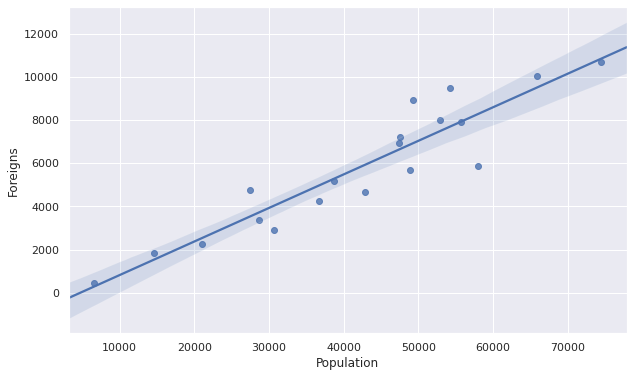

In [65]:
sns.regplot(x="Population", y="Foreigns", data=df_val)

<AxesSubplot:xlabel='Women population', ylabel='Tourism '>

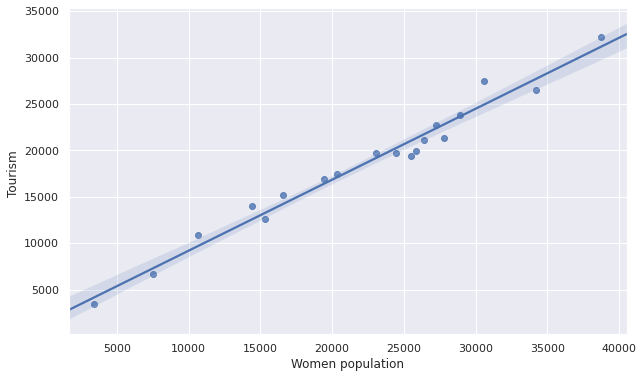

In [66]:
sns.regplot(x="Women population", y="Tourism ", data=df_val)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


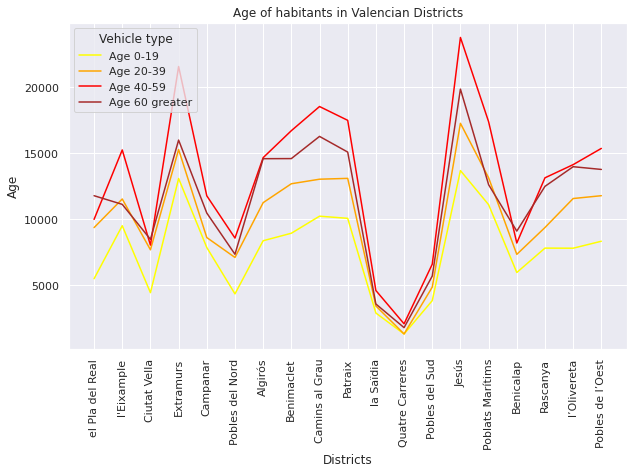

In [67]:
by_age=df_val.sort_values('Age 20-39', ascending=False)

g4 = sns.lineplot(x='District', y='Age 0-19', data=by_age, color='yellow')
g4 = sns.lineplot(x='District', y='Age 20-39', data=by_age, color='orange')
g4 = sns.lineplot(x='District', y='Age 40-59', data=by_age, color='red')
g4 = sns.lineplot(x='District', y='Age 60 greater', data=by_age, color='brown')

g4.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.set(rc = {'figure.figsize':(10,6)})
g4.set_title('Age of habitants in Valencian Districts')
g4.set(xlabel='Districts', ylabel='Age')
g4.legend(title='Vehicle type', loc='upper left', labels=['Age 0-19', 'Age 20-39', 'Age 40-59', 'Age 60 greater'])


July 20, 2021 \
By Luis Enrique Palma \
https://www.linkedin.com/in/luisenriquepalma